In [14]:
print('ACIT 4610, Portfolio-2024')
print('\nGroup-13')
print('\nparticipate: Thomas, M khan, Harith')

ACIT 4610, Portfolio-2024

Group-13

participate: Thomas, M khan, Harith


Problem 1: Traffic Management Optimization Using Multi-Objective Evolutionary 
Algorithms.

Objective: 
Urban traffic management requires balancing multiple conflicting objectives, such as 
minimizing travel time, reducing fuel consumption, and minimizing air pollution. Your task is 
to apply a Multi-Objective Evolutionary Algorithm (MOEA) to optimize traffic management 
strategies for selected New York City (NYC) areas. The goal is to minimize conflicting 
objectives, Total Travel Time (TTT) and Fuel Consumption (FC), using real-world traffic data 
from NYC Open Data. 

Optimization Objectives: 
1. Minimize Total Travel Time (TTT): 
o Reduce the overall travel time for all vehicles within the network. 
2. Minimize Fuel Consumption (FC): 
o Reduce the total fuel consumption across the network, influenced by factors 
such as speed, acceleration, and traffic congestion. 

Data Source: 
The necessary data for this assignment can be accessed from the NYC Open Data portal: 
• NYC Traffic Volume Counts (2014-2022): NYC Open Data - Traffic Volume 
(https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts/btm5
ppia/about_data) 

• Traffic Speed Data: NYC Open Data -Traffic Speed
(https://data.cityofnewyork.us/Transportation/DOT-Traffic-Speeds-NBE/i4gi
tjb9/about_data) 

 
• Fuel Consumption Data: Estimated using empirical models based on traffic speed and volume. 

First step to run this project, is to install requirements python libraries.

In [15]:
print('Tools and Libraries:')
print('\n1- Python 3.')
print('\n2- OpenAI Gym for the environment.')
print('\n3- Deep to use Genetic Programming, implement an evolutionary algorithms.')
print('\n4- NumPy for numerical computations.')
print('\n5- pandas for data manipulation and analysis.')
print('\n6- requests for the process of sending and receiving data from websites.')
print('\n7- Matplotlib for plotting results.')
print('\n8- TensorFlow/PyTorch for more advanced RL algorithms like DQN.')
print('\n9- pymoo for for multi-objective optimization algorithms.')
print('\n10-Keras for the convenience of mathematical calculations')

!pip3 freeze
!pip3 install gym numpy tensorflow keras openAi matplotlib requests pandas gym deap pymoo

import sys
print('System version',sys.version)

Tools and Libraries:

1- Python 3.

2- OpenAI Gym for the environment.

3- Deep to use Genetic Programming, implement an evolutionary algorithms.

4- NumPy for numerical computations.

5- pandas for data manipulation and analysis.

6- requests for the process of sending and receiving data from websites.

7- Matplotlib for plotting results.

8- TensorFlow/PyTorch for more advanced RL algorithms like DQN.

9- pymoo for for multi-objective optimization algorithms.

10-Keras for the convenience of mathematical calculations
about-time==4.2.1
alive-progress==3.1.5
asttokens==2.4.1
autograd==1.7.0
beautifulsoup4==4.12.3
certifi==2024.8.30
charset-normalizer==3.4.0
cma==3.2.2
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
deap==1.4.1
debugpy==1.8.7
decorator==5.1.1
Deprecated==1.2.14
dill==0.3.9
executing==2.1.0
fonttools==4.54.1
frozendict==2.4.6
grapheme==0.6.0
html5lib==1.1
idna==3.10
ipykernel==6.29.5
ipython==8.28.0
jedi==0.19.1
joblib==1.4.2
jupyter_client==8.6.3
jupyter_cor

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


1. Data Exploration: 
A. Download and explore the NYC traffic volume and speed data for the selected 
road segments. 

Will focus on optimizing traffic management for the three road segments in New 
York City.  
1. 5th Ave between 46th St and 47th St
2. Atlantic Ave between ALABAMA AVE and WILLIAMS AVE 
3. Queens Blvd between Union Tpke and Yellowstone Blvd (Queens) 

The traffic management strategy involves controlling traffic signal timings (green, yellow, and 
red light durations) and setting speed limits on these segments. Your task is to develop an 
MOEA (discussed in lectures) that optimizes these parameters to achieve the best trade-off 
between minimizing TTT and FC.

In [39]:
# Define the dataset, and feching possible data using api
# 1. Average Speed of a Vehicle Traveled Between End Points dataset
# https://data.cityofnewyork.us/Transportation/DOT-Traffic-Speeds-NBE/i4gi-tjb9/data_preview

import requests
import pandas as pd

# Api key if neede
NYC_OPEN_DATA_API_KEY = 'br55d9sqptry35vxzglajqzfe'
NYC_OPEN_DATA_API_SecretKEY='4sk51l5by3uvyn516za8g2wen7cn1wokbry0e2ayfo1lugq6fl'

# API endpoint
Average_Speed_of_Vehicle_Traveled_Between_End_Points_url = "https://data.cityofnewyork.us/resource/i4gi-tjb9.json"

# Optional: Add parameters to limit the number of rows or filter data
params = {
    "$limit": 1000000000000000,  # Fetch 100000 records.(All possible records)
}
# Fetch the data using a GET request
Average_Speed_response = requests.get(Average_Speed_of_Vehicle_Traveled_Between_End_Points_url, params=params)

# Check if the request was successful (status code 200)
if Average_Speed_response.status_code == 200:
    Average_Speed_of_Vehicle_Traveled_Between_End_Points_data = pd.DataFrame(Average_Speed_response.json())
    
    # Display the first few rows of the DataFrame
    print(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data.head(5))
else:
    print(f"Error: {Average_Speed_response.status_code}")


Error: 500


In [17]:
# Dataset info
print(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      100000 non-null  object
 1   speed                   100000 non-null  object
 2   travel_time             100000 non-null  object
 3   status                  100000 non-null  object
 4   data_as_of              100000 non-null  object
 5   link_id                 100000 non-null  object
 6   link_points             100000 non-null  object
 7   encoded_poly_line       100000 non-null  object
 8   encoded_poly_line_lvls  100000 non-null  object
 9   owner                   100000 non-null  object
 10  transcom_id             100000 non-null  object
 11  borough                 100000 non-null  object
 12  link_name               100000 non-null  object
dtypes: object(13)
memory usage: 9.9+ MB
None


In [18]:
# Display the columns names
print(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data.columns)

Index(['id', 'speed', 'travel_time', 'status', 'data_as_of', 'link_id',
       'link_points', 'encoded_poly_line', 'encoded_poly_line_lvls', 'owner',
       'transcom_id', 'borough', 'link_name'],
      dtype='object')


In [19]:
list(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data.columns.values.tolist())

['id',
 'speed',
 'travel_time',
 'status',
 'data_as_of',
 'link_id',
 'link_points',
 'encoded_poly_line',
 'encoded_poly_line_lvls',
 'owner',
 'transcom_id',
 'borough',
 'link_name']

In [20]:
# due to the large number of colums, we display the important columns
Average_Speed_of_Vehicle_Traveled_Between_End_Points_data[['id', 'speed', 'travel_time', 'link_id', 'borough', 'link_name']].head()

,id,speed,travel_time,link_id,borough,link_name
0,383,0,0,4616217,Staten Island,SIE W - MLK N WOOLEY AVENUE - WLAKER STREET
1,388,60.27,47,4616211,Staten Island,SIE W RICHMOND AVENUE - SOUTH AVENUE
2,171,6.21,1883,4616357,Queens,Belt Pkwy W JFK Expressway - VWE N Jamaica Ave
3,332,18.01,505,4616354,Queens,Laurelton Pkwy S @ SSP - Belt Pkwy W 182nd St
4,159,40.38,137,4616252,Bronx,BRP N WATSON AVENUE - FORDHAM ROAD


In [40]:
# 2. Traffic Volume Count dataset
# https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts/btm5-ppia/data_preview

import requests
import pandas as pd

# Api key if neede
NYC_OPEN_DATA_API_KEY = 'br55d9sqptry35vxzglajqzfe'
NYC_OPEN_DATA_API_SecretKEY='4sk51l5by3uvyn516za8g2wen7cn1wokbry0e2ayfo1lugq6fl'

# API endpoint
Traffic_Volume_Count_url = "https://data.cityofnewyork.us/resource/btm5-ppia.json"

# Optional: Add parameters to limit the number of rows or filter data
params = {
    "$limit": 1000000000000000,  # Fetch 10000 records.(All possible records)
}

# Fetch the data using a GET request
Traffic_Volume_Count_response = requests.get(Traffic_Volume_Count_url, params=params)

# Check if the request was successful (status code 200)
if Traffic_Volume_Count_response.status_code == 200:
    Traffic_Volume_Count_data = pd.DataFrame(Traffic_Volume_Count_response.json())
    
    # Display the first few rows of the DataFrame
    print(Traffic_Volume_Count_data.head(5))
else:
    print(f"Error: {Traffic_Volume_Count_response.status_code}")


Error: 500


Print data columns, in order to select what columns we need to serve

In [22]:
# Dataset info
print(Traffic_Volume_Count_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42756 entries, 0 to 42755
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              42756 non-null  object
 1   segmentid       42756 non-null  object
 2   roadway_name    42756 non-null  object
 3   from            42756 non-null  object
 4   to              42756 non-null  object
 5   direction       42756 non-null  object
 6   date            42756 non-null  object
 7   _12_00_1_00_am  42752 non-null  object
 8   _1_00_2_00am    42752 non-null  object
 9   _2_00_3_00am    42752 non-null  object
 10  _3_00_4_00am    42752 non-null  object
 11  _4_00_5_00am    42752 non-null  object
 12  _5_00_6_00am    42752 non-null  object
 13  _6_00_7_00am    42752 non-null  object
 14  _7_00_8_00am    42752 non-null  object
 15  _8_00_9_00am    42752 non-null  object
 16  _9_00_10_00am   42752 non-null  object
 17  _10_00_11_00am  42753 non-null  object
 18  _11_00

In [23]:
# Display the columns names
print(Traffic_Volume_Count_data.columns)

Index(['id', 'segmentid', 'roadway_name', 'from', 'to', 'direction', 'date',
       '_12_00_1_00_am', '_1_00_2_00am', '_2_00_3_00am', '_3_00_4_00am',
       '_4_00_5_00am', '_5_00_6_00am', '_6_00_7_00am', '_7_00_8_00am',
       '_8_00_9_00am', '_9_00_10_00am', '_10_00_11_00am', '_11_00_12_00pm',
       '_12_00_1_00pm', '_1_00_2_00pm', '_2_00_3_00pm', '_3_00_4_00pm',
       '_4_00_5_00pm', '_5_00_6_00pm', '_6_00_7_00pm', '_7_00_8_00pm',
       '_8_00_9_00pm', '_9_00_10_00pm', '_10_00_11_00pm', '_11_00_12_00am'],
      dtype='object')


In [24]:
Traffic_Volume_Count_data
# Print column names for Traffic_Volume_Count_data
print("Column names in Traffic_Volume_Count_data:")
print(Traffic_Volume_Count_data.columns) 

Column names in Traffic_Volume_Count_data:
Index(['id', 'segmentid', 'roadway_name', 'from', 'to', 'direction', 'date',
       '_12_00_1_00_am', '_1_00_2_00am', '_2_00_3_00am', '_3_00_4_00am',
       '_4_00_5_00am', '_5_00_6_00am', '_6_00_7_00am', '_7_00_8_00am',
       '_8_00_9_00am', '_9_00_10_00am', '_10_00_11_00am', '_11_00_12_00pm',
       '_12_00_1_00pm', '_1_00_2_00pm', '_2_00_3_00pm', '_3_00_4_00pm',
       '_4_00_5_00pm', '_5_00_6_00pm', '_6_00_7_00pm', '_7_00_8_00pm',
       '_8_00_9_00pm', '_9_00_10_00pm', '_10_00_11_00pm', '_11_00_12_00am'],
      dtype='object')


In [25]:
list(Traffic_Volume_Count_data.columns.values.tolist())

['id',
 'segmentid',
 'roadway_name',
 'from',
 'to',
 'direction',
 'date',
 '_12_00_1_00_am',
 '_1_00_2_00am',
 '_2_00_3_00am',
 '_3_00_4_00am',
 '_4_00_5_00am',
 '_5_00_6_00am',
 '_6_00_7_00am',
 '_7_00_8_00am',
 '_8_00_9_00am',
 '_9_00_10_00am',
 '_10_00_11_00am',
 '_11_00_12_00pm',
 '_12_00_1_00pm',
 '_1_00_2_00pm',
 '_2_00_3_00pm',
 '_3_00_4_00pm',
 '_4_00_5_00pm',
 '_5_00_6_00pm',
 '_6_00_7_00pm',
 '_7_00_8_00pm',
 '_8_00_9_00pm',
 '_9_00_10_00pm',
 '_10_00_11_00pm',
 '_11_00_12_00am']

In [ ]:
# due to the large number of colums, we display some columns
Traffic_Volume_Count_data[['id', 'segmentid', 'roadway_name', 'from', 'to', '_12_00_1_00_am' ,'_11_00_12_00am']].head()

,id,segmentid,roadway_name,from,to,_12_00_1_00_am,_11_00_12_00am
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,20,42
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,21,35
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,27,43
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,22,43
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,31,54


Selecting the project area
For selecting the data in the first area:
1. 5th Ave between 46th St and 47th St

In [26]:
# 5th Ave between 46th St and 47th St (Manhattan)
first_area = Traffic_Volume_Count_data[
    (Traffic_Volume_Count_data['roadway_name'].str.contains('5th Ave', case=False)) 
    &  # Filter for '5th Ave' in roadway_name
    (Traffic_Volume_Count_data['from'].str.contains('46th St', case=False)) &  # Ensure 'from' contains '42nd St'
    (Traffic_Volume_Count_data['to'].str.contains('47th St', case=False))  # Ensure 'to' contains '47th St'
]

# Adjust pandas settings to print all rows
pd.set_option('display.max_rows', None)  # No limit on the number of rows displayed

# Print all rows from the filtered data, showing only relevant columns
print(first_area[['id', 'segmentid', 'roadway_name', 'from', 'to']])

        id segmentid roadway_name              from                to
24641  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET
24643  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET
24645  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET
24647  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET
24649  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET
24651  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET


Selecting the project area
For selecting the data in the second area:
2. Atlantic Ave between ALABAMA AVE and WILLIAMS AVE

In [27]:
second_area = Traffic_Volume_Count_data[
    (Traffic_Volume_Count_data['roadway_name'].str.contains('Atlantic Ave', case=False)) 
    &  # Filter for 'Atlantic Ave' in roadway_name
    (Traffic_Volume_Count_data['from'].str.contains('ALABAMA AVE', case=False)) &  # Ensure 'from' contains 'Flatbush Ave'
    (Traffic_Volume_Count_data['to'].str.contains('WILLIAMS AVE', case=False))  # Ensure 'to' contains 'Bedford Ave'
]

# Adjust pandas settings to print all rows
pd.set_option('display.max_rows', None)  # No limit on the number of rows displayed

# Print all rows from the filtered data, showing only relevant columns
print(second_area[['id', 'segmentid', 'roadway_name', 'from', 'to']])

       id segmentid  roadway_name         from            to
8181  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8182  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8183  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8184  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8185  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8186  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8187  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8188  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8189  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8190  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8191  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8192  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8193  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8194  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8195  314    150671  ATLANTIC AVE  ALABAMA AVE  WILLIAMS AVE
8196  314    150671  ATL

For selecting the data in the third area:
3. Queens Blvd between Union Tpke and Yellowstone Blvd (Queens) 

In [28]:
# Filter for Queens Blvd between Union Tpke and Yellowstone Blvd (Queens)
third_area = Traffic_Volume_Count_data[
    (Traffic_Volume_Count_data['roadway_name'].str.contains('Queens Blvd', case=False)) &  # Filter for 'Queens Blvd' in roadway_name
    (Traffic_Volume_Count_data['from'].str.contains('Jackson Ave', case=False)) &  # Ensure 'from' contains 'Union Tpke'
    (Traffic_Volume_Count_data['to'].str.contains('Skillman Ave', case=False))  # Ensure 'to' contains 'Yellowstone Blvd'
]

# Adjust pandas settings to print all rows
pd.set_option('display.max_rows', None)  # No limit on the number of rows displayed

# Print all rows from the filtered data, showing only relevant columns
print(third_area[['id', 'segmentid', 'roadway_name', 'from', 'to']])

        id segmentid roadway_name         from            to
41190  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41191  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41192  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41193  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41194  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41195  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41196  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41197  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41198  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41199  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41200  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41201  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41202  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41203  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41204  281     67234  Queens Blvd  Jackson Ave  Skillman Ave
41205  281     67234  Qu

In [74]:
# we merege the three selected area in one dataset
Traffic_Volume_Count_data_for_selected_area = pd.concat([first_area, second_area, third_area], ignore_index=True)

# Show the result
print(Traffic_Volume_Count_data_for_selected_area[['id', 'segmentid', 'roadway_name', 'from', 'to']])


     id segmentid  roadway_name              from                to
0   185     35806    5th AVENUE  EAST 46th STREET  EAST 47th STREET
1   185     35806    5th AVENUE  EAST 46th STREET  EAST 47th STREET
2   185     35806    5th AVENUE  EAST 46th STREET  EAST 47th STREET
3   185     35806    5th AVENUE  EAST 46th STREET  EAST 47th STREET
4   185     35806    5th AVENUE  EAST 46th STREET  EAST 47th STREET
5   185     35806    5th AVENUE  EAST 46th STREET  EAST 47th STREET
6   314    150671  ATLANTIC AVE       ALABAMA AVE      WILLIAMS AVE
7   314    150671  ATLANTIC AVE       ALABAMA AVE      WILLIAMS AVE
8   314    150671  ATLANTIC AVE       ALABAMA AVE      WILLIAMS AVE
9   314    150671  ATLANTIC AVE       ALABAMA AVE      WILLIAMS AVE
10  314    150671  ATLANTIC AVE       ALABAMA AVE      WILLIAMS AVE
11  314    150671  ATLANTIC AVE       ALABAMA AVE      WILLIAMS AVE
12  314    150671  ATLANTIC AVE       ALABAMA AVE      WILLIAMS AVE
13  314    150671  ATLANTIC AVE       ALABAMA AV

Define the consumption_linear, Constraints Speed limits for all vehicles(v_min, v_max), and plot the result

In this step we have to select the count data for asigned in the selected area.

In [102]:
# Ensure 'id' columns are strings (in case they are not already strings)
Traffic_Volume_Count_data_for_selected_area['id'] = Traffic_Volume_Count_data_for_selected_area['id'].astype(str)
Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['id'] = Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['id'].astype(str)

# Perform the merge

Dataset = pd.merge(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data, Traffic_Volume_Count_data_for_selected_area, on='id', how='inner')

In [105]:
# Merge datasets on 'id' (strings)
Dataset = pd.merge(Traffic_Volume_Count_data_for_selected_area, Average_Speed_of_Vehicle_Traveled_Between_End_Points_data, on='id', how='inner')

# Check the shape of the resulting merged dataset
print(Dataset.shape)

# Check the first few rows of the merged dataset
print(Dataset.head(3))


(4914, 43)
    id segmentid roadway_name              from                to direction  \
0  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
1  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
2  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   

                      date _12_00_1_00_am _1_00_2_00am _2_00_3_00am  ...  \
0  2017-01-14T00:00:00.000           1286         1061          714  ...   
1  2017-01-14T00:00:00.000           1286         1061          714  ...   
2  2017-01-14T00:00:00.000           1286         1061          714  ...   

  status               data_as_of  link_id  \
0      0  2024-11-07T07:18:03.000  4616267   
1      0  2024-11-07T07:13:03.000  4616267   
2      0  2024-11-07T07:08:03.000  4616267   

                                         link_points  \
0  40.8304204,-73.850811 40.83156,-73.854671 40.8...   
1  40.8304204,-73.850811 40.83156,-73.854671 40.8...   
2  40.8304204,

In [106]:
# Display the first few rows of the merged DataFrame
print(Dataset.head(10))

    id segmentid roadway_name              from                to direction  \
0  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
1  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
2  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
3  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
4  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
5  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
6  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
7  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
8  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
9  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   

                      date _12_00_1_00_am _1_00_2_00am _2_00_3_00am  ...  \
0  2017-01-14T00:00:00.000           1286         1061

In [108]:
print(Dataset.columns)
print(Dataset)
print(Dataset['segmentid'],['roadway_name'],['from'],['to'],['peak_hour_volume'],['peak_hour'],['speed'])

Index(['id', 'segmentid', 'roadway_name', 'from', 'to', 'direction', 'date',
       '_12_00_1_00_am', '_1_00_2_00am', '_2_00_3_00am', '_3_00_4_00am',
       '_4_00_5_00am', '_5_00_6_00am', '_6_00_7_00am', '_7_00_8_00am',
       '_8_00_9_00am', '_9_00_10_00am', '_10_00_11_00am', '_11_00_12_00pm',
       '_12_00_1_00pm', '_1_00_2_00pm', '_2_00_3_00pm', '_3_00_4_00pm',
       '_4_00_5_00pm', '_5_00_6_00pm', '_6_00_7_00pm', '_7_00_8_00pm',
       '_8_00_9_00pm', '_9_00_10_00pm', '_10_00_11_00pm', '_11_00_12_00am',
       'speed', 'travel_time', 'status', 'data_as_of', 'link_id',
       'link_points', 'encoded_poly_line', 'encoded_poly_line_lvls', 'owner',
       'transcom_id', 'borough', 'link_name'],
      dtype='object')
       id segmentid roadway_name              from                to  \
0     185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET   
1     185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET   
2     185     35806   5th AVENUE  EAST 46th STREET  EAS

In [ ]:
# Merge the Traffic_Volume_Count_data, and Selected_NewYork_City_Data on 'id'
Data = pd.merge(Traffic_Volume_Count_data_for_selected_area, Average_Speed_of_Vehicle_Traveled_Between_End_Points_data, on='id', how='inner')

In [ ]:
print(Traffic_Volume_Count_data.columns)

Index(['id', 'segmentid', 'roadway_name', 'from', 'to', 'direction', 'date',
       '_12_00_1_00_am', '_1_00_2_00am', '_2_00_3_00am', '_3_00_4_00am',
       '_4_00_5_00am', '_5_00_6_00am', '_6_00_7_00am', '_7_00_8_00am',
       '_8_00_9_00am', '_9_00_10_00am', '_10_00_11_00am', '_11_00_12_00pm',
       '_12_00_1_00pm', '_1_00_2_00pm', '_2_00_3_00pm', '_3_00_4_00pm',
       '_4_00_5_00pm', '_5_00_6_00pm', '_6_00_7_00pm', '_7_00_8_00pm',
       '_8_00_9_00pm', '_9_00_10_00pm', '_10_00_11_00pm', '_11_00_12_00am',
       'peak_hour_volume', 'peak_hour'],
      dtype='object')


In [26]:
# Display the merged DataFrame
print(Traffic_Volume_Count_data_for_selected_area.head(5))

    id segmentid roadway_name              from                to direction  \
0  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
1  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
2  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
3  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   
4  185     35806   5th AVENUE  EAST 46th STREET  EAST 47th STREET        SB   

                      date _12_00_1_00_am _1_00_2_00am _2_00_3_00am  ...  \
0  2017-01-14T00:00:00.000           1286         1061          714  ...   
1  2017-01-14T00:00:00.000           1286         1061          714  ...   
2  2017-01-14T00:00:00.000           1286         1061          714  ...   
3  2017-01-14T00:00:00.000           1286         1061          714  ...   
4  2017-01-14T00:00:00.000           1286         1061          714  ...   

  status               data_as_of  link_id  \
0      0  2024-11-07T0

Step 2
Define peak-hour traffic volumes, 
average speeds, and any available environmental indicators. 

list of hourly columns in NewYork City Data

In [114]:
# List of hourly columns in NewYork_City_Data
hourly_columns = [
    '_12_00_1_00_am', '_1_00_2_00am', '_2_00_3_00am', '_3_00_4_00am',
    '_4_00_5_00am', '_5_00_6_00am', '_6_00_7_00am', '_7_00_8_00am',
    '_8_00_9_00am', '_9_00_10_00am', '_10_00_11_00am', '_11_00_12_00pm',
    '_12_00_1_00pm', '_1_00_2_00pm', '_2_00_3_00pm', '_3_00_4_00pm',
    '_4_00_5_00pm', '_5_00_6_00pm', '_6_00_7_00pm', '_7_00_8_00pm',
    '_8_00_9_00pm', '_9_00_10_00pm', '_10_00_11_00pm', '_11_00_12_00am'
]

# Convert hourly columns to numeric
Data[hourly_columns] = Data[hourly_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

B. Identify and preprocess relevant data points, such as peak-hour traffic volumes, 
average speeds, and any available environmental indicators.

Calculate the peak-hour traffic

In [112]:
Data=Dataset

In [117]:
# Peak-hour traffic volumes for each record in dataset
Data['peak_hour_volume'] = Data[hourly_columns].max(axis=1)  # Max volume for each record
Data['peak_hour'] = Data[hourly_columns].idxmax(axis=1)  # Hourly peak volume

# Get Total traffic for each hour across the dataset
hourly_sums = Data[hourly_columns].sum()

# Overall peak hour across all records
overall_peak_hour = hourly_sums.idxmax()
overall_peak_volume = hourly_sums.max()

print(Data[['from','to', 'peak_hour', 'peak_hour_volume']].head(6))


print(f"New Your City Overall peak hour: {overall_peak_hour}, Overall volume: {overall_peak_volume}")

               from                to     peak_hour  peak_hour_volume
0  EAST 46th STREET  EAST 47th STREET  _7_00_8_00pm              1893
1  EAST 46th STREET  EAST 47th STREET  _7_00_8_00pm              1893
2  EAST 46th STREET  EAST 47th STREET  _7_00_8_00pm              1893
3  EAST 46th STREET  EAST 47th STREET  _7_00_8_00pm              1893
4  EAST 46th STREET  EAST 47th STREET  _7_00_8_00pm              1893
5  EAST 46th STREET  EAST 47th STREET  _7_00_8_00pm              1893
New Your City Overall peak hour: _7_00_8_00pm, Overall volume: 8150688


Calculate Average Speed

In [ ]:
Data = Average_Speed_of_Vehicle_Traveled_Between_End_Points_data

In [128]:
# Calculate the average speed
Data['speed'] = Data['speed'].astype(str)
Data['speed'] = Data['speed'].str.replace('.', '', regex=False)

# Convert the 'speed' column to numeric
Data['speed'] = pd.to_numeric(Data['speed'], errors='coerce')

# Calculate the average speed.
average_speed = Data['speed'].mean()

# Output the result
print(f"The average speed is: {average_speed} mph")

The average speed is: 3485.932844932845 mph


In [38]:
from deap import base, creator, tools, algorithms
import random

In [131]:
# Extract speeds from the dataframe
travel_times = Data['travel_time'].values
speeds = Data['speed'].values
print(travel_times, speeds)

['489' '446' '452' ... '91' '77' '60'] [ 497  559  559 ... 2734 3293 4163]


The goal is to minimize conflicting 
objectives, Total Travel Time (TTT) and Fuel Consumption (FC)

2. Fuel Consumption Calculation: 
A. Define the Fuel Consumption Model: § Fuel consumption typically depends on vehicle speed. Any empirical 
model can estimate fuel consumption per vehicle based on average speed. 

A common empirical model is:  
Fuel Consumption per vehicle = 𝑎	×	𝑉 + 𝑏	× [1/v] + c
Where: 
• V is the average speed (in mph). 
 
• a, b, and c are empirical constants that defined based on literature or assumptions. 




Speed and Corresponding Fuel Consumption:
      Speed (V) [mph]  Fuel Consumption (L/100 km)
0                 497                     5.074024
1                 559                     5.693578
2                 559                     5.693578
3                 559                     5.693578
4                 621                     6.313221
5                 559                     5.693578
6                 559                     5.693578
7                 683                     6.932928
8                 807                     8.172478
9                 745                     7.552685
10                745                     7.552685
11                869                     8.792301
12                118                     1.296949
13               1553                    15.631288
14               2112                    21.220947
15                292                     3.026849
16               4722                    47.320424
17               5405                  

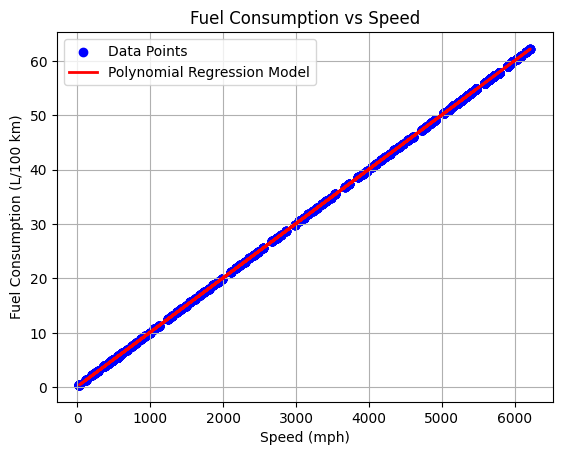

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Coefficients for the Fuel Consumption Model
a = 0.01  
b = 2 
c = 0.1 

# Fuel consumption function for each vehicle
def fuel_consumption(speed):
    return a * speed + b * (1 / speed) + c

Traffic_Volume_Count_data_for_selected_area['speed'] = pd.to_numeric(
    Traffic_Volume_Count_data_for_selected_area['speed'], errors='coerce')


Traffic_Volume_Count_data_for_selected_area = Traffic_Volume_Count_data_for_selected_area.dropna(subset=['speed'])

# Define the independent variable (Speed) and dependent variable (Fuel Consumption)
X = Traffic_Volume_Count_data_for_selected_area['speed'].values.reshape(-1, 1)  # Reshape to 2D array for sklearn
y = fuel_consumption(Traffic_Volume_Count_data_for_selected_area['speed'])  # Calculate fuel consumption

# Print out for checking in a table format
df_X_y = pd.DataFrame({
    'Speed (V) [mph]': X.flatten(),  # Flatten X for table
    'Fuel Consumption (L/100 km)': y
})
print("\nSpeed and Corresponding Fuel Consumption:")
print(df_X_y)

# Create Polynomial features (degree 2 for quadratic regression)
poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, y)

# Get the model parameters (intercept and coefficients)
print(f"\nModel intercept: {model.intercept_}")
print(f"Model coefficients: {model.coef_}")

# Predict fuel consumption based on the fitted model
predicted_y = model.predict(X_poly)

# Plot the original data and the polynomial regression line
plt.scatter(Traffic_Volume_Count_data_for_selected_area['speed'], y, color='blue', label='Data Points')
plt.plot(X, predicted_y, color='red', label='Polynomial Regression Model', linewidth=2)
plt.title('Fuel Consumption vs Speed')
plt.xlabel('Speed (mph)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.legend()
plt.grid(True)
plt.show()


Now, we update the code to Calculate Total Fuel Consumption: 
§ For each road segment and time interval, calculate the total fuel 
consumption using the following formula: 
Total Fuel Consumption (FC) =  
Volume	×	𝑎	×	𝑉+𝑏	×	1
 𝑉
 Where: 
+𝑐	×	Segment	Length 
• n is the number of time intervals. 
• Volumei is the vehicle count in interval i from the Traffic 

In [50]:
print(Traffic_Volume_Count_data_for_selected_area[['speed','travel_time', 'peak_hour', 'peak_hour_volume','segmentid']])

      speed travel_time      peak_hour  peak_hour_volume segmentid
0     10.56         239   _7_00_8_00pm              1893     35806
1     16.15         155   _7_00_8_00pm              1893     35806
2     32.93          76   _7_00_8_00pm              1893     35806
3     47.84          52   _7_00_8_00pm              1893     35806
4     46.60          54   _7_00_8_00pm              1893     35806
5     47.84          53   _7_00_8_00pm              1893     35806
6     27.34          92   _7_00_8_00pm              1893     35806
7     35.41          71   _7_00_8_00pm              1893     35806
8     48.46          52   _7_00_8_00pm              1893     35806
9     48.46          52   _7_00_8_00pm              1893     35806
10    53.43          47   _7_00_8_00pm              1893     35806
11    52.19          48   _7_00_8_00pm              1893     35806
12    52.19          48   _7_00_8_00pm              1893     35806
13    41.01          62   _7_00_8_00pm              1893     3

Calculate Total Fuel Consumption: 
For each road segment and time interval, calculate the total fuel 
consumption using the following formula: 

[\sum_{i=1}^{n}(Volume_{i} \times (a\times V_{i}+b \times \frac{1}{V_{i}}+c) \times segment Length_{i})]


In [ ]:
#Calculate Total Fuel Consumption: d
def calculate_sum(Volume, V, segment_Length, a, b, c):
    # Initialize the summation result
    total_sum = 0
    
    # Loop through each index i from 0 to n-1 (for Python indexing)
    for i in range(len(Volume)):
        # Expression for each i-th term
        term = Volume[i] * (a * V[i] + b / V[i] + c) * segment_Length[i]
        
        # Accumulate the result
        total_sum += term
    
    return total_sum

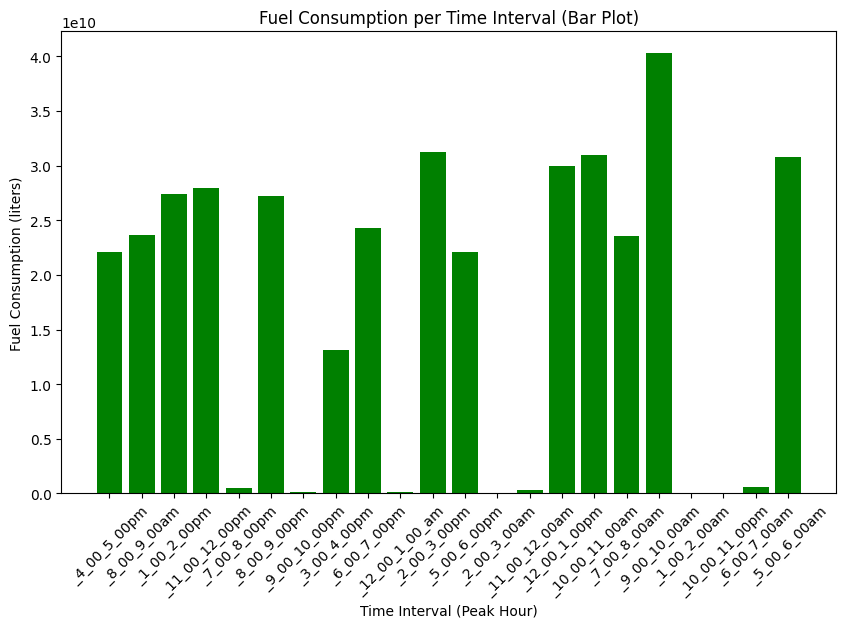

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Coefficients for the Fuel Consumption Model
a = 0.01  # Coefficient for speed (V)
b = 2  # Coefficient for 1/V
c = 0.1  # Constant term

# Initialize a variable to store total fuel consumption
total_fuel_consumption = 0

# Create a list to store individual fuel consumption for each interval
fuel_consumption_per_interval = []

# Loop over each row in the dataset
for index, row in Traffic_Volume_Count_data_for_selected_area.iterrows():
    # Extract values for Volume, Speed, and Segment Length
    Volume = row['peak_hour_volume']  # Vehicle count in the peak hour (Volume)
    V = row['speed']  # Average speed in mph
    Segment_Length = row['segmentid']  # Segment length in miles (assuming 'segmentid' holds segment length)
    
    # Ensure the values are valid numbers and V is not zero
    if np.isnan(Volume) or np.isnan(V) or np.isnan(Segment_Length) or V == 0:
        fuel_consumption_per_interval.append(np.nan)  # Append NaN if any value is invalid
        continue  # Skip this row
    
    # Calculate the fuel consumption for the current interval using the formula:
    # Fuel Consumption_i = Volume_i * (a * V_i + b * (1 / V_i) + c) * Segment_Length_i
    
    
    fuel_consumption = Volume * (a * V + b * (1 / V) + c) * Segment_Length
    
    # Append the fuel consumption for this interval to the list
    fuel_consumption_per_interval.append(fuel_consumption)
    
    # Add the current fuel consumption to the total fuel consumption
    total_fuel_consumption += fuel_consumption

# Add the fuel consumption data to the dataset, filling NaNs where necessary
Traffic_Volume_Count_data_for_selected_area['Fuel_Consumption'] = fuel_consumption_per_interval

# Ensure that the length of the 'fuel_consumption_per_interval' matches the DataFrame length
assert len(Traffic_Volume_Count_data_for_selected_area) == len(fuel_consumption_per_interval), \
    "Mismatch in length between the DataFrame and fuel consumption list"

# Plotting fuel consumption for each time interval (using Bar Plot)
plt.figure(figsize=(10, 6))
plt.bar(Traffic_Volume_Count_data_for_selected_area['peak_hour'], 
        Traffic_Volume_Count_data_for_selected_area['Fuel_Consumption'], 
        color='green')

plt.xlabel('Time Interval (Peak Hour)')
plt.ylabel('Fuel Consumption (liters)')
plt.title('Fuel Consumption per Time Interval (Bar Plot)')
plt.xticks(rotation=45)
plt.show()


3. Formulate the Optimization Problem: 
o Decision Variables: Determine which variables (e.g., signal timings, speed 
limits) will be controlled in your optimization strategy. 
o Objectives: Define the objectives (TTT, FC) your MOEA will optimize. 
o Constraints: Consider any practical constraints (e.g., total signal cycle time, 
minimum and maximum speed limits). 

* Decision Variables: 
A. signaltiming represents the green, yellow, and red signal durations for each intersection.
B. Speed limit
Vspeed



Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Generation 67
Generation 68
Generation 69
Generation 70
Generation 71
Generation 72
G

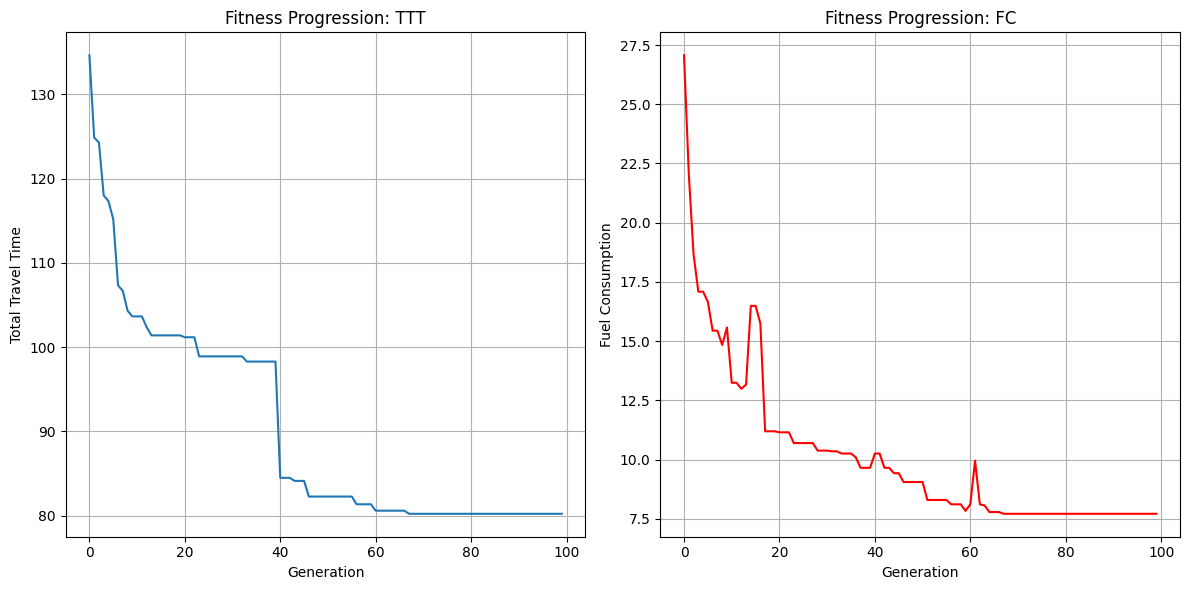

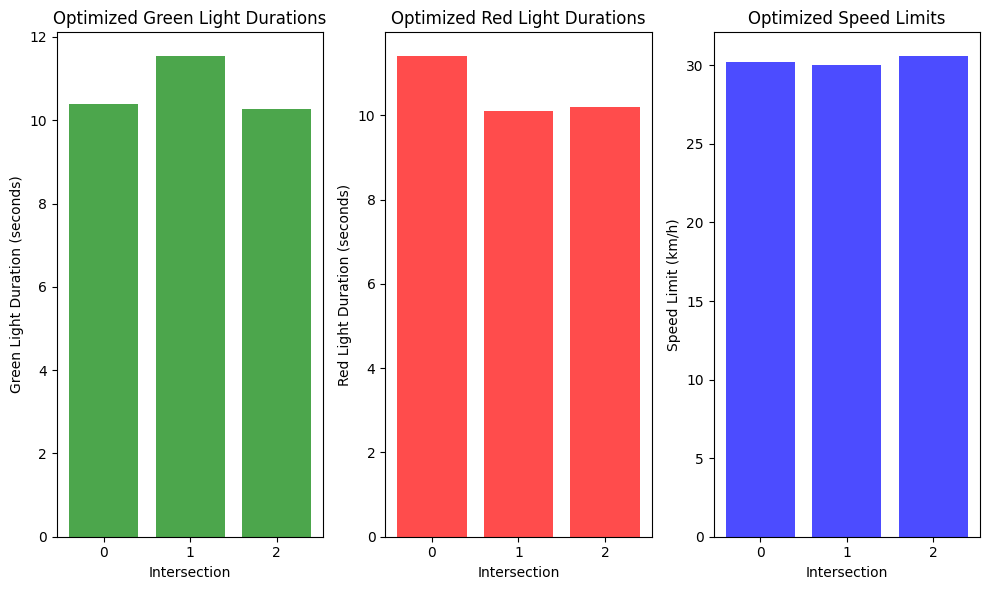

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Define the parameters
num_intersections = 3  # Number of intersections
max_signal_cycle_time = 120  # Maximum signal cycle time in seconds (sum of green, yellow, red)
speed_limit_min = 30  # Minimum speed limit in km/h
speed_limit_max = 120  # Maximum speed limit in km/h
green_min = 10  # Minimum green light duration in seconds
green_max = 60  # Maximum green light duration in seconds
yellow_duration = 3  # Yellow light duration in seconds 
red_min = 10  # Minimum red light duration in seconds
red_max = 60  # Maximum red light duration in seconds
population_size = 50  # Population size for the GA
num_generations = 100  # Number of generations to evolve
cx_prob = 0.7  # Crossover probability
mut_prob = 0.2  # Mutation probability
tournament_size = 3  # Tournament size for selection

# Create the problem's fitness and individual types
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Minimize both objectives (TTT and FC)
creator.create("Individual", list, fitness=creator.FitnessMin)

# Define the objective function: minimize Total Travel Time (TTT) and Fuel Consumption (FC)
def evaluate(individual):
    # Extract decision variables from individual
    green_times = individual[:num_intersections]  # Green light durations for each intersection
    red_times = individual[num_intersections:2*num_intersections]  # Red light durations for each intersection
    speed_limits = individual[2*num_intersections:]  # Speed limits for each road segment

    # Dummy calculations for TTT and FC (replace these with real models)
    # TTT (simplified): assume linear relationship for travel time
    TTT = sum(green * 2 + red * 0.5 for green, red in zip(green_times, red_times))  # Calculate travel time
    FC = sum(red * 0.1 + speed * 0.05 for red, speed in zip(red_times, speed_limits))  # Calculate fuel consumption

    return TTT, FC

# Create individual generation function (initialize individuals randomly)
def create_individual():
    green_times = [random.uniform(green_min, green_max) for _ in range(num_intersections)]
    red_times = [random.uniform(red_min, red_max) for _ in range(num_intersections)]
    speed_limits = [random.uniform(speed_limit_min, speed_limit_max) for _ in range(num_intersections)]
    return green_times + red_times + speed_limits

# Define mutation function to mutate the decision variables
def mutate(individual):
    # Randomly choose an index to mutate
    index = random.randint(0, len(individual) - 1)
    if index < num_intersections:  # Green light mutation
        individual[index] = random.uniform(green_min, green_max)
    elif index < 2 * num_intersections:  # Red light mutation
        individual[index] = random.uniform(red_min, red_max)
    else:  # Speed limit mutation
        individual[index] = random.uniform(speed_limit_min, speed_limit_max)

    return individual,

# Define crossover function
def crossover(ind1, ind2):
    cxpoint = random.randint(1, len(ind1) - 1)
    ind1[cxpoint:], ind2[cxpoint:] = ind2[cxpoint:], ind1[cxpoint:]
    return ind1, ind2

# Register the problem components with DEAP
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", crossover)
toolbox.register("mutate", mutate)
toolbox.register("select", tools.selTournament, tournsize=tournament_size)
toolbox.register("evaluate", evaluate)

# Create initial population
population = toolbox.population(n=population_size)

# Track the fitness values for visualization
fitness_history = []

# Run the genetic algorithm
def run_genetic_algorithm():
    # Evaluate the fitness of the initial population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Run the genetic algorithm for a set number of generations
    for gen in range(num_generations):
        print(f"Generation {gen + 1}")
        
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cx_prob:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mut_prob:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the fitness of the individuals with invalid fitness values
        invalid_individuals = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_individuals))
        for ind, fit in zip(invalid_individuals, fitnesses):
            ind.fitness.values = fit

        # Replace the old population with the new one
        population[:] = offspring

        # Track the best individual fitness values
        top_individual = tools.selBest(population, 1)[0]
        fitness_history.append(top_individual.fitness.values)

    # Return the best individual found
    return tools.selBest(population, 1)[0]

# Run the GA
best_individual = run_genetic_algorithm()

# Extract and print the optimized solution
green_times = best_individual[:num_intersections]
red_times = best_individual[num_intersections:2*num_intersections]
speed_limits = best_individual[2*num_intersections:]

print("Optimized Green Light Durations (seconds):", green_times)
print("Optimized Red Light Durations (seconds):", red_times)
print("Optimized Speed Limits (km/h):", speed_limits)

# Visualization: Plot the fitness progression (TTT and FC over generations)
fitness_history = np.array(fitness_history)
plt.figure(figsize=(12, 6))

# Plot Total Travel Time (TTT) and Fuel Consumption (FC)
plt.subplot(1, 2, 1)
plt.plot(fitness_history[:, 0], label="Total Travel Time (TTT)")
plt.xlabel('Generation')
plt.ylabel('Total Travel Time')
plt.title('Fitness Progression: TTT')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(fitness_history[:, 1], label="Fuel Consumption (FC)", color='r')
plt.xlabel('Generation')
plt.ylabel('Fuel Consumption')
plt.title('Fitness Progression: FC')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualization: Plot the optimized signal timings and speed limits
plt.figure(figsize=(10, 6))

# Plot Green Light Durations
plt.subplot(1, 3, 1)
plt.bar(range(num_intersections), green_times, color='g', alpha=0.7)
plt.xlabel('Intersection')
plt.ylabel('Green Light Duration (seconds)')
plt.title('Optimized Green Light Durations')

# Plot Red Light Durations
plt.subplot(1, 3, 2)
plt.bar(range(num_intersections), red_times, color='r', alpha=0.7)
plt.xlabel('Intersection')
plt.ylabel('Red Light Duration (seconds)')
plt.title('Optimized Red Light Durations')

# Plot Speed Limits
plt.subplot(1, 3, 3)
plt.bar(range(num_intersections), speed_limits, color='b', alpha=0.7)
plt.xlabel('Intersection')
plt.ylabel('Speed Limit (km/h)')
plt.title('Optimized Speed Limits')

plt.tight_layout()
plt.show()



4. Implement the MOEA: 
o Design an initial population of potential solutions (chromosomes), each 
representing a different traffic management strategy. 
Page 3 of 12 
o Define the genetic operators (e.g., crossover, mutation) used to evolve the 
population. 
o Implement elitism. 
o Evaluate the performance of each solution based on the defined objectives. 
5. Analysis and Results: 
o Run the MOEA to generate a set of Pareto-optimal solutions. 
o Analyze the trade-offs between the different objectives by examining the Pareto 
front. 
o Experiment with different configurations and strategies within the MOEA to 
understand how different trade-offs can be achieved. 
o Discuss the implications of your findings for traffic management in NYC. 
Submission Requirements: 
1. Code Implementation: Submit the source code used to implement the MOEA. Include 
a README file with instructions for running the code and explanations of the approach 
used. 
2. Report: A report explaining: 
o The data extraction and preprocessing steps. 
o Your formulation of the optimization problem, including the decision variables, 
objectives, and constraints. 
o Discuss your implemented chromosome, population, genetic operators, and 
elitism strategy. 
o The results, including a discussion of the Pareto front and trade-offs between 
objectives. 
o Discussion of different configurations (parameter values) and strategies within 
the MOEA to understand how different trade-offs can be achieved. 
o Recommendations for traffic management based on your findings. 
3. Visualization: Provide visualizations of the Pareto front and any other relevant data 
(e.g., traffic patterns, speed distributions). 
Evaluation Criteria: 
• Problem Formulation: How well you define and justify your decision variables, 
objectives, and constraints. 
• Implementation: How efficiently you implement the MOEA (chromosome, population, 
genetic operators, and elitism strategy). 
• Heuristic: Implementing any heuristic is not mandatory but an extra scope to grading. 
• Optimization Results: The quality of the Pareto front and the exploration of trade-offs 
between objectives. 
• Report Quality: Clarity, depth of analysis, and quality of recommendations. 
• Code Quality: Organization, readability, and documentation. 

Implement the MOEA using Genetic Algorithm

Best solutions found (chromosomes): 
 [[119.84667765  10.01923603  10.042093  ]
 [119.84667765  10.01923603  31.26067287]
 [119.84667765  10.01923603  10.042093  ]
 [119.84667765  10.01923603  10.042093  ]
 [ 84.94140564  10.01923603  10.042093  ]
 [119.84667765  10.01923603  10.042093  ]
 [119.84667765  10.01923603  10.042093  ]
 [119.84667765  10.01923603  10.042093  ]
 [119.84667765  10.01923603  10.042093  ]
 [ 72.31247265  10.01923603  10.042093  ]]
Function values (TTT, FC) for each solution: 
 [[2181.31531896   21.35556003]
 [2181.31531896   21.35556003]
 [2181.31531896   21.35556003]
 [2181.31531896   21.35556003]
 [2181.31531896   21.35556003]
 [2181.31531896   21.35556003]
 [2181.31531896   21.35556003]
 [2181.31531896   21.35556003]
 [2181.31531896   21.35556003]
 [2181.31531896   21.35556003]]


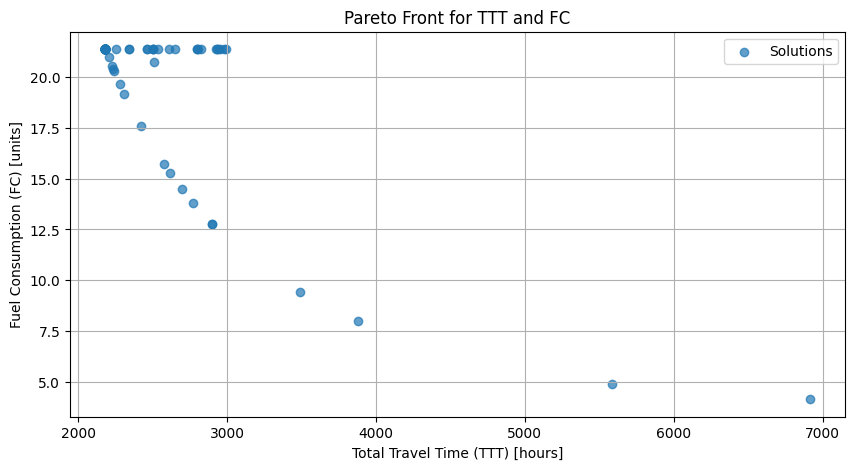

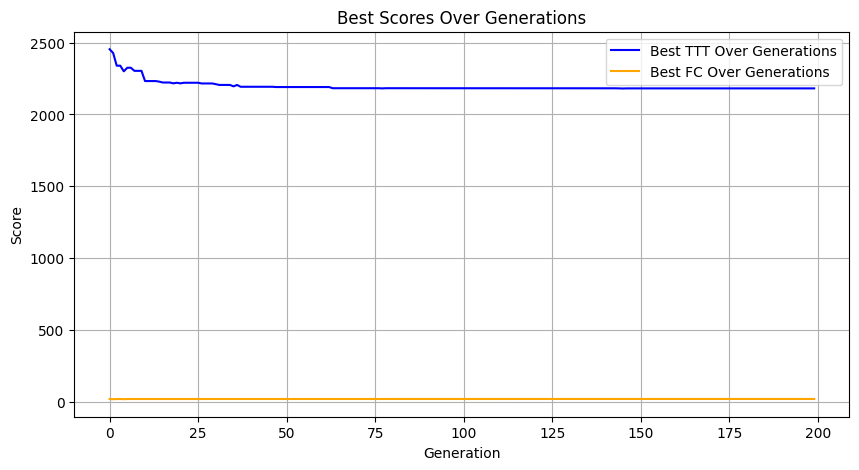

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract travel times and speeds, ensuring they are numeric
travel_times = pd.to_numeric(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['travel_time'], errors='coerce').values
speeds = pd.to_numeric(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['speed'], errors='coerce').values

# Remove any NaN values if they exist
valid_indices = ~np.isnan(travel_times) & ~np.isnan(speeds)
travel_times = travel_times[valid_indices]
speeds = speeds[valid_indices]

# Constants for fuel consumption model
a, b, c = 0.05, 0.001, 1.0

# Constraints for speed limits and signal timings
V_min, V_max = 30, 120  # Speed limits in km/h
green_min, green_max = 10, 60  # Green light duration in seconds
yellow_duration = 3  # Yellow light duration in seconds
red_min, red_max = 10, 60  # Red light duration in seconds

# Genetic Algorithm parameters
POP_SIZE = 100
N_GENERATIONS = 200
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.9

# Initialize population
def initialize_population(pop_size, n_var):
    # Each individual will have the format [speed, green_light, red_light]
    return np.random.uniform(low=[V_min, green_min, red_min], 
                              high=[V_max, green_max, red_max], 
                              size=(pop_size, n_var))

# Objective functions
def objective_functions(variables):
    speed = variables[0]
    green_light = variables[1]
    red_light = variables[2]
    
    # Total Travel Time (TTT) calculation
    travel_time = np.sum(travel_times) / speed + (green_light + red_light) * len(travel_times) / 60  # Convert to hours
    
    # Fuel Consumption (FC) calculation
    fuel_consumption = a * speed + b * speed**2 + c
    
    return np.array([travel_time, fuel_consumption])

# Evaluate population
def evaluate_population(population):
    return np.array([objective_functions(ind) for ind in population])

# Tournament selection
def tournament_selection(population, scores, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        indices = np.random.choice(len(population), tournament_size)
        selected.append(population[indices[np.argmin(scores[indices, 0])]])  # Minimize TTT
    return np.array(selected)

# Crossover
def crossover(parent1, parent2):
    if np.random.rand() < CROSSOVER_RATE:
        point = np.random.randint(1, len(parent1)-1)
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    return parent1.copy(), parent2.copy()

# Mutation
def mutate(variables):
    for i in range(len(variables)):
        if np.random.rand() < MUTATION_RATE:
            if i == 0:  # Speed variable
                variables[i] = np.random.uniform(V_min, V_max)
            elif i == 1:  # Green light variable
                variables[i] = np.random.uniform(green_min, green_max)
            elif i == 2:  # Red light variable
                variables[i] = np.random.uniform(red_min, red_max)
    return variables

# Main genetic algorithm
def genetic_algorithm():
    n_var = 3  # Number of variables: speed, green light, red light
    population = initialize_population(POP_SIZE, n_var)
    
    # Store the best scores over generations for visualization
    best_scores_over_time = []
    
    for generation in range(N_GENERATIONS):
        scores = evaluate_population(population)
        
        # Sort by total travel time, then fuel consumption
        sorted_indices = np.argsort(scores[:, 0])
        population = population[sorted_indices]
        scores = scores[sorted_indices]
        
        # Store the best score of this generation
        best_scores_over_time.append(scores[0])
        
        # Create next generation
        selected = tournament_selection(population, scores)
        next_generation = []
        
        for i in range(0, len(selected), 2):
            if i + 1 < len(selected):
                children = crossover(selected[i], selected[i + 1])
                next_generation.extend(children)
            else:
                next_generation.append(selected[i])
        
        population = np.array([mutate(ind) for ind in next_generation])
        
    return population, scores, best_scores_over_time

# Run the genetic algorithm
final_population, final_scores, best_scores_over_time = genetic_algorithm()

# Output the best solutions
best_indices = np.argsort(final_scores[:, 0])
best_solutions = final_population[best_indices][:10]
best_scores = final_scores[best_indices][:10]

print("Best solutions found (chromosomes): \n", best_solutions)
print("Function values (TTT, FC) for each solution: \n", best_scores)

# Plot the Pareto front (Trade-off between TTT and FC)
plt.figure(figsize=(10, 5))
plt.scatter(final_scores[:, 0], final_scores[:, 1], label="Solutions", alpha=0.7)
plt.xlabel("Total Travel Time (TTT) [hours]")
plt.ylabel("Fuel Consumption (FC) [units]")
plt.title("Pareto Front for TTT and FC")
plt.legend()
plt.grid(True) 
plt.show()

# Plot the best scores over generations
best_scores_over_time = np.array(best_scores_over_time)
plt.figure(figsize=(10, 5))
plt.plot(best_scores_over_time[:, 0], label='Best TTT Over Generations', color='blue')
plt.plot(best_scores_over_time[:, 1], label='Best FC Over Generations', color='orange')
plt.xlabel("Generation")
plt.ylabel("Score")
plt.title("Best Scores Over Generations")
plt.legend()
plt.grid(True)
plt.show()


Develop the code above using NSGA-II algorithm

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      2 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      200 |      2 |  0.000000E+00 |  0.000000E+00 |  0.0413828126 |         ideal
     3 |      300 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0484164492 |         ideal
     4 |      400 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0487839420 |         ideal
     5 |      500 |     13 |  0.000000E+00 |  0.000000E+00 |  0.0277392565 |         ideal
     6 |      600 |      6 |  0.000000E+00 |  0.000000E+00 |  0.0499869922 |         ideal
     7 |      700 |     15 |  0.000000E+00 |  0.000000E+00 |  0.0081539078 |         ideal
     8 |      800 |     16 |  0.000000E+00 |  0.000000E+00 |  0.0178532798 |         ideal
     9 |      900 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0145089401 |         ideal
    10 |     1000 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0125588208 |         ideal

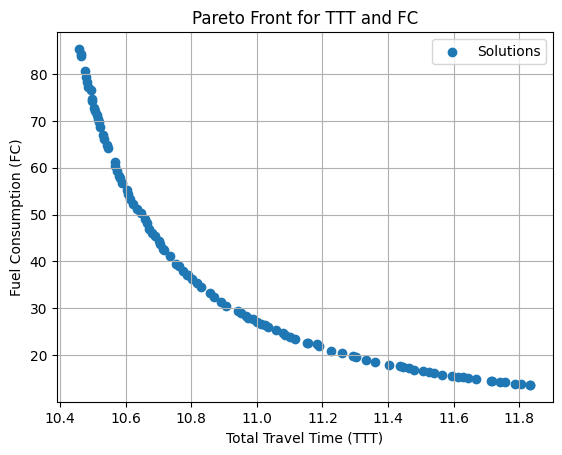

In [166]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.termination import get_termination
import matplotlib.pyplot as plt

# Define constants for fuel consumption model
a, b, c = 0.05, 0.001, 1.0

# Constraints for speeds and signal timings
V_min, V_max = 30, 120  # Speed limits in km/h
t_min, t_max = 10, 120  # Signal timings in seconds

# Distances for each vehicle (example)
distances = np.array([10, 15, 12, 18])  # km for each vehicle

# Define the Multi-Objective Problem
class TrafficOptimizationProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=len(distances) + 2,  # Speeds for vehicles + 2 signal timings
                         n_obj=2,  # Two objectives: TTT and FC
                         n_constr=4,  # Constraints: Speed and signal timing limits
                         xl=np.concatenate(([V_min] * len(distances), [t_min, t_min])),  # Lower bounds
                         xu=np.concatenate(([V_max] * len(distances), [t_max, t_max])))  # Upper bounds

    def _evaluate(self, variables, out, *args, **kwargs):
        # Extract speeds and signal timings from decision variables
        V = variables[:len(distances)]
        t_s = variables[len(distances):]

        # Objective 1: Total Travel Time (TTT)
        travel_times = distances / V
        avg_signal_delay = np.mean(t_s)
        TTT = np.sum(travel_times) + avg_signal_delay

        # Objective 2: Fuel Consumption (FC)
        FC = np.sum(a * V + b * V**2 + c)

        # Constraints: Speed and signal timing bounds already handled by xl and xu
        out["F"] = [TTT, FC]

        # Constraints are passed as zero if satisfied
        out["G"] = [V_min - np.min(V),  # Ensure speeds are above V_min
                    np.max(V) - V_max,  # Ensure speeds are below V_max
                    t_min - np.min(t_s),  # Ensure timings are above t_min
                    np.max(t_s) - t_max]  # Ensure timings are below t_max

# Define the NSGA-II algorithm
algorithm = NSGA2(pop_size=100)

# Set the termination criterion to 200 generations
termination = get_termination("n_gen", 200)

# Initialize the problem
problem = TrafficOptimizationProblem()

# Perform the optimization
result = minimize(problem, algorithm, termination, seed=1, save_history=True, verbose=True)

# Output the results
print("Best solution found: \n", result.X)
print("Function value: \n", result.F)

# Plot the Pareto front (Trade-off between TTT and FC)
F = result.F
plt.scatter(F[:, 0], F[:, 1], label="Solutions")
plt.xlabel("Total Travel Time (TTT)")
plt.ylabel("Fuel Consumption (FC)")
plt.title("Pareto Front for TTT and FC")
plt.legend()
plt.grid(True)
plt.show()